In [12]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

In [15]:
ratings = pd.read_csv(Path('..','res','data','ratings.csv'))
movies = pd.read_csv(Path('..','res','data','movies.csv'))

matrix = ratings.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
train, test = train_test_split(matrix, test_size=0.2, random_state=42)
matrix_numpy = matrix.to_numpy()

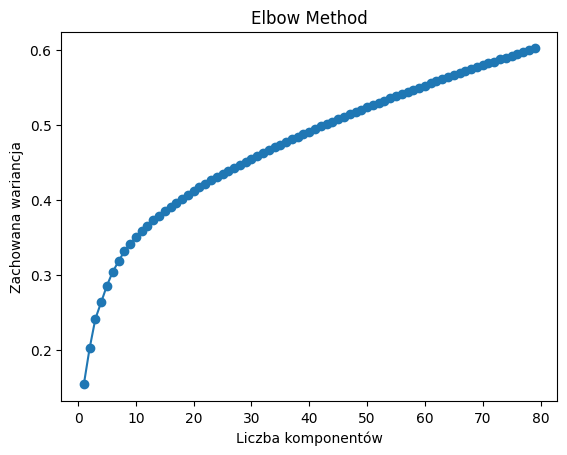

In [20]:
num_components = range(1, 80)
explained_variances = []

for n in num_components:
    svd = TruncatedSVD(n_components=n)
    svd.fit(matrix_numpy)
    explained_variances.append(svd.explained_variance_ratio_.sum())

# Wygeneruj wykres
plt.plot(num_components, explained_variances, marker='o')
plt.xlabel('Liczba komponentów')
plt.ylabel('Zachowana wariancja')
plt.title('Elbow Method')
plt.show()